In [1]:
import numpy as np  # For numerical operations

In [2]:
import pandas as pd  # For data manipulation

In [3]:
import matplotlib.pyplot as plt  # For plotting

In [4]:
import seaborn as sns  # For data visualization

In [5]:
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets

In [6]:
from sklearn.preprocessing import StandardScaler  # For feature scaling

In [7]:
from sklearn.svm import SVC  # Support Vector Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For model evaluation

In [11]:
# 2. Loading and Exploring the Dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [12]:
print("Dataset Head:\n", data.head())  # Display the first few rows of the dataset

Dataset Head:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [13]:
print("Dataset Info:\n", data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
Dataset Info:
 None


In [14]:
print("Summary Statistics:\n", data.describe())  # Get s

Summary Statistics:
                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.0900

In [15]:
# 3. Data Preprocessing
# Handling missing values - drop rows with missing values in 'bmi' (or you can fill them)
data = data.dropna()

In [16]:
# Encoding categorical features - convert 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' to numerical
data = pd.get_dummies(data, drop_first=True)

In [17]:
# Feature Scaling - Normalize numerical features
scaler = StandardScaler()

In [18]:
features = data.drop('stroke', axis=1)  # Drop the target variable
target = data['stroke']  # Target variable


In [19]:
scaled_features = scaler.fit_transform(features)


In [20]:
# 4. Splitting the Dataset into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

In [21]:
print(f"Training Data Shape: {X_train.shape}")

Training Data Shape: (3436, 17)


In [22]:
print(f"Testing Data Shape: {X_test.shape}")

Testing Data Shape: (1473, 17)


In [23]:
# 5. Training the Models
# (i) SVM Model
svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [24]:
# (ii) Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# (iii) KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# 6. Evaluating and Comparing Model Performance
# SVM Model Evaluation
svm_predictions = svm_model.predict(X_test)
print("SVM Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions, zero_division=1))  # Set zero_division=1 to avoid warnings
print("Accuracy Score:", accuracy_score(y_test, svm_predictions))

SVM Model Performance:
Confusion Matrix:
 [[1401    0]
 [  72    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       1.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.98      0.50      0.49      1473
weighted avg       0.95      0.95      0.93      1473

Accuracy Score: 0.9511201629327902


In [27]:
# Decision Tree Model Evaluation
dt_predictions = dt_model.predict(X_test)
print("\nDecision Tree Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))


Decision Tree Model Performance:
Confusion Matrix:
 [[1322   79]
 [  63    9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1401
           1       0.10      0.12      0.11        72

    accuracy                           0.90      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.91      0.90      0.91      1473

Accuracy Score: 0.9035980991174474


In [28]:
# KNN Model Evaluation
knn_predictions = knn_model.predict(X_test)
print("\nKNN Model Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Accuracy Score:", accuracy_score(y_test, knn_predictions))


KNN Model Performance:
Confusion Matrix:
 [[1399    2]
 [  71    1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.33      0.01      0.03        72

    accuracy                           0.95      1473
   macro avg       0.64      0.51      0.50      1473
weighted avg       0.92      0.95      0.93      1473

Accuracy Score: 0.9504412763068567


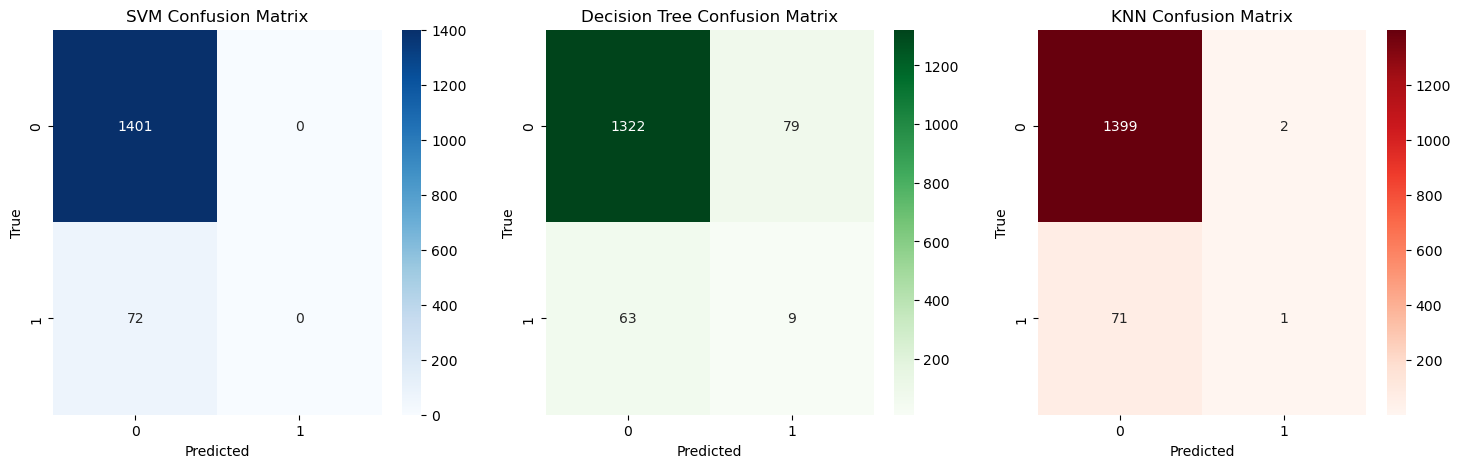

In [29]:
# 7. Visualizing Results

# Plotting the Confusion Matrices for Each Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', ax=axes[2], cmap='Reds')
axes[2].set_title('KNN Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.show()